In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_1h = pd.read_csv('D:/payday/train_public/1h/L06.B01_1H.csv')
df_weather = pd.read_csv('D:/payday/train_public/weather/L06_weather_train.csv')

In [5]:
df_1h.columns

Index(['timestamp', 'main_meter(kW)', 'PV_battery_system(kW)'], dtype='object')

In [6]:
df_1h.describe()

,main_meter(kW),PV_battery_system(kW)
count,7072.000000,4128.000000
mean,65.193515,12.133935
std,47.154753,13.292939
min,-36.020340,0.000000
25%,24.128006,1.153860
50%,59.180866,6.548332
75%,99.655075,20.315916
max,169.728317,51.085075


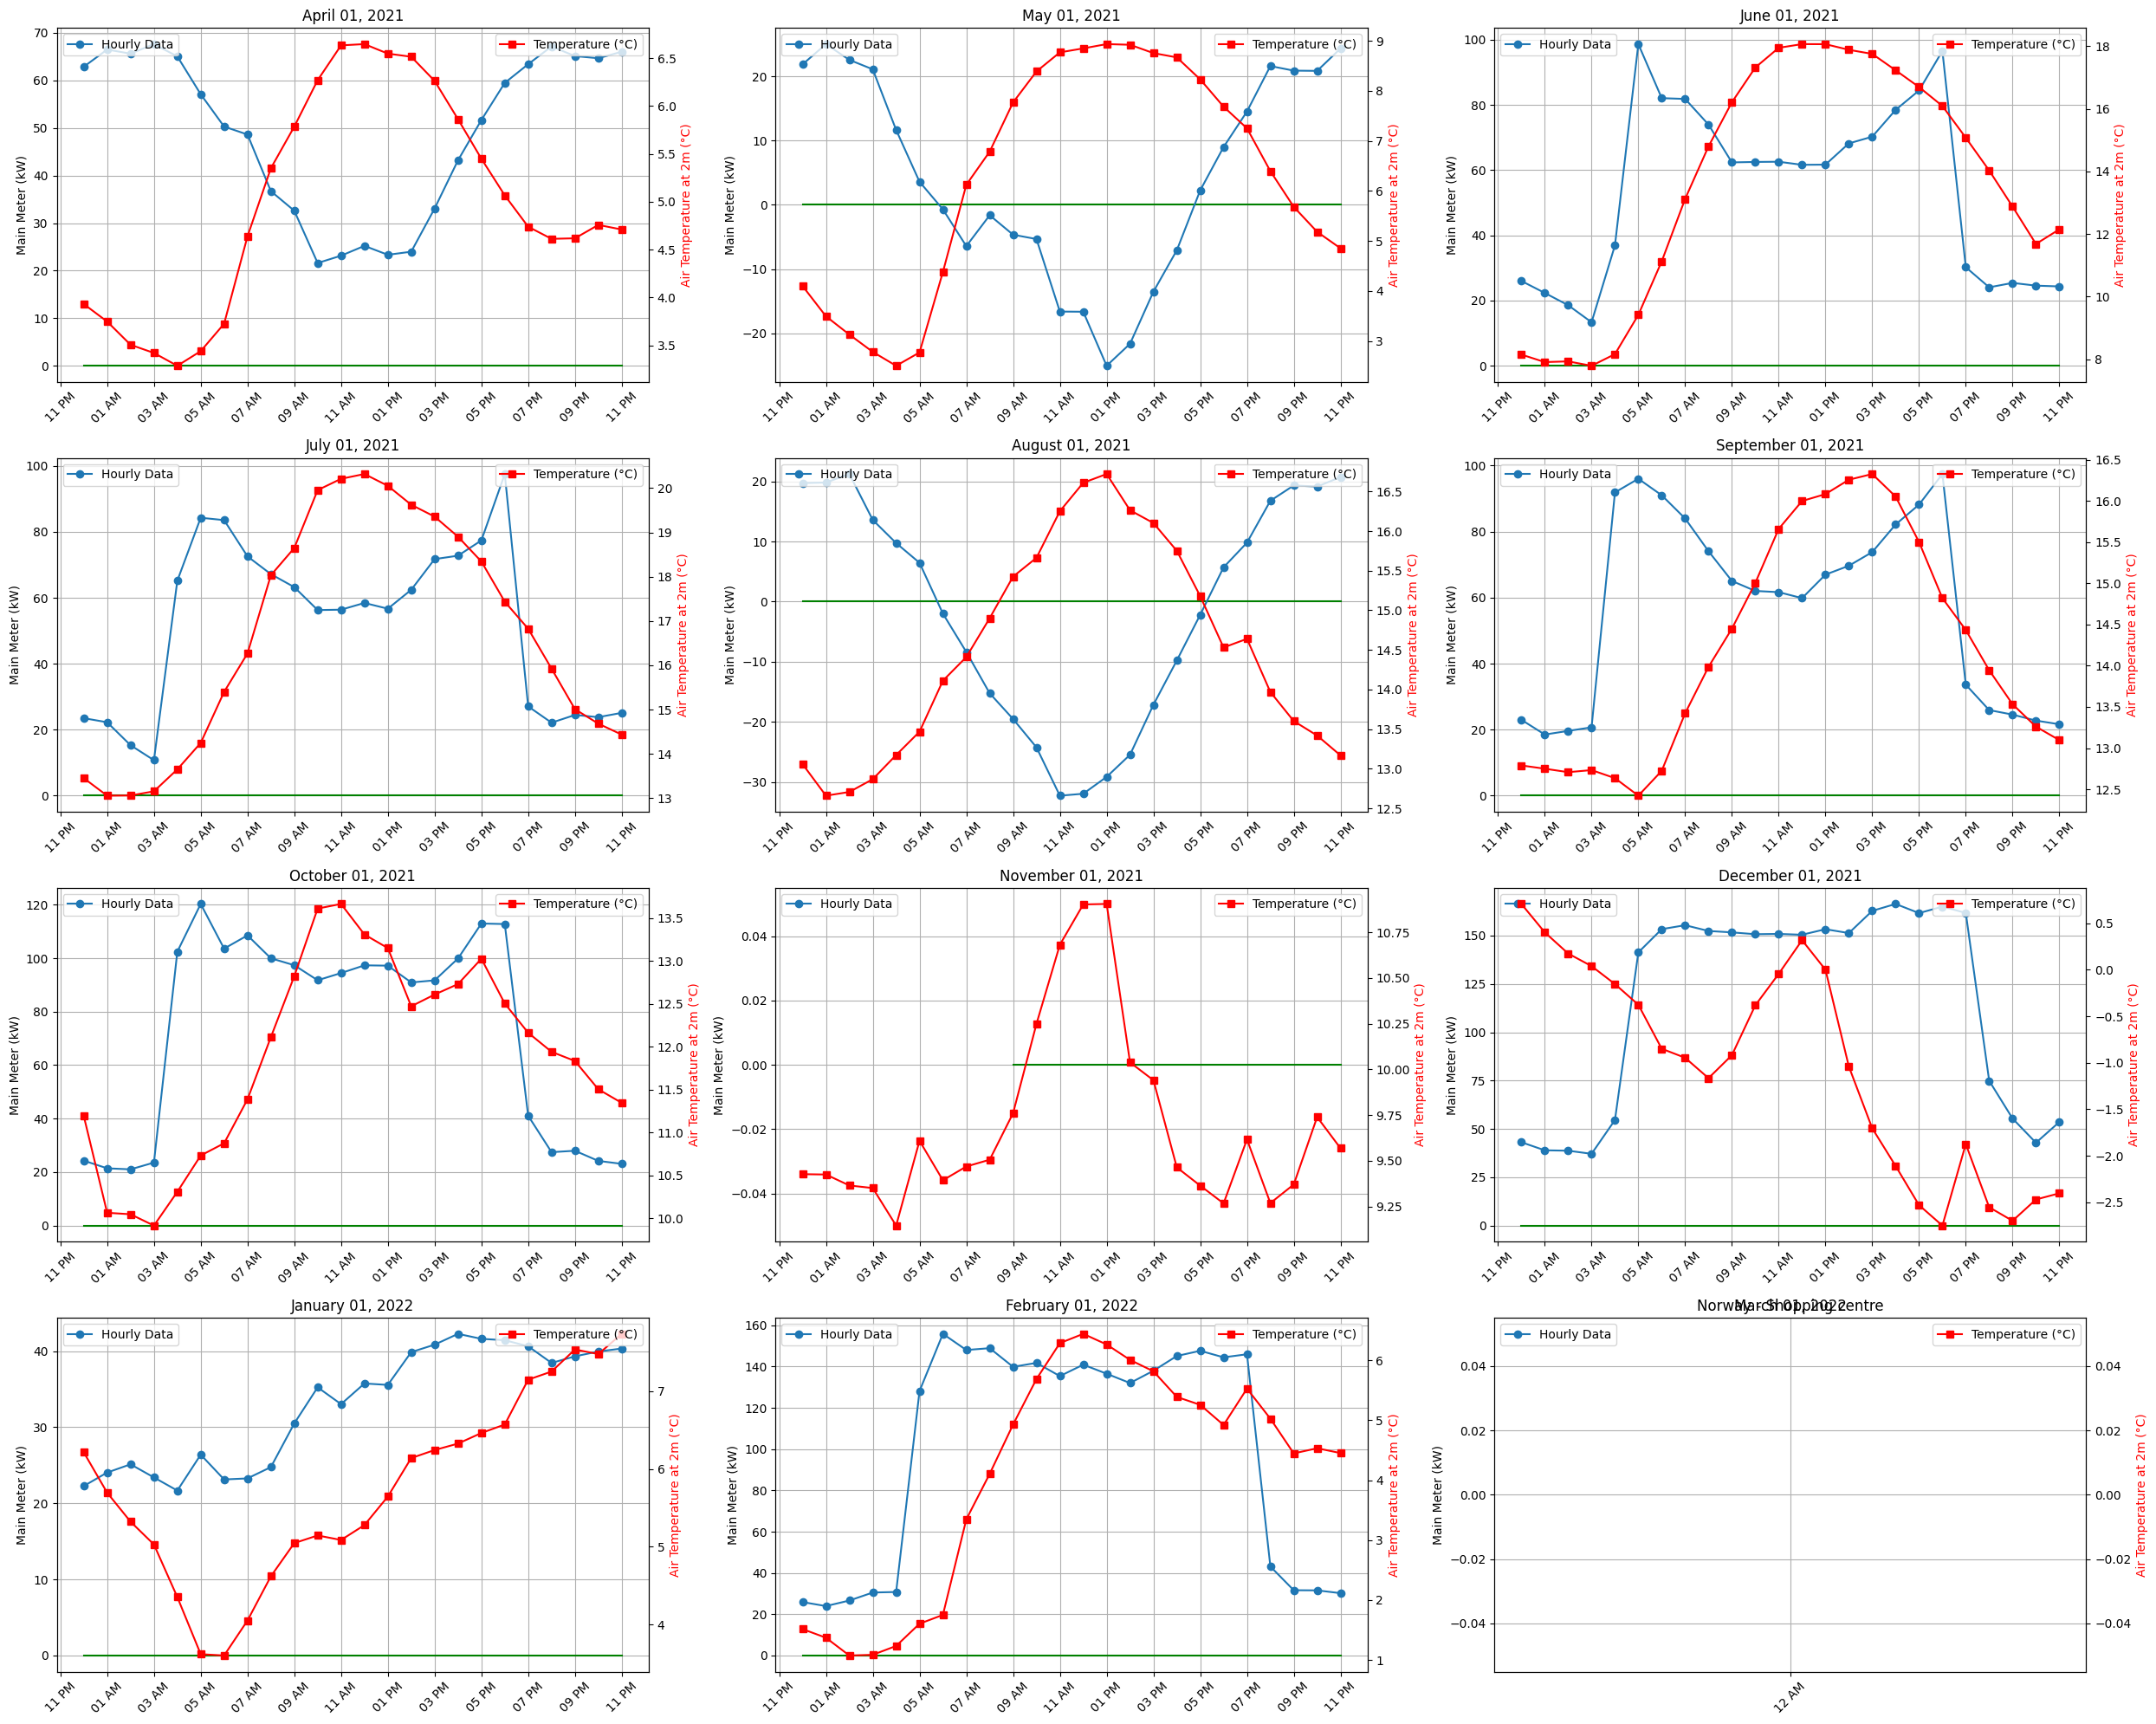

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h, df_bo1min15, and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])

df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2021-04-01', end='2022-03-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'],[0]*len(one_day_hourly['main_meter(kW)']),color = 'green')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    
    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:

    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.title('Norway - Shopping centre')
plt.show()

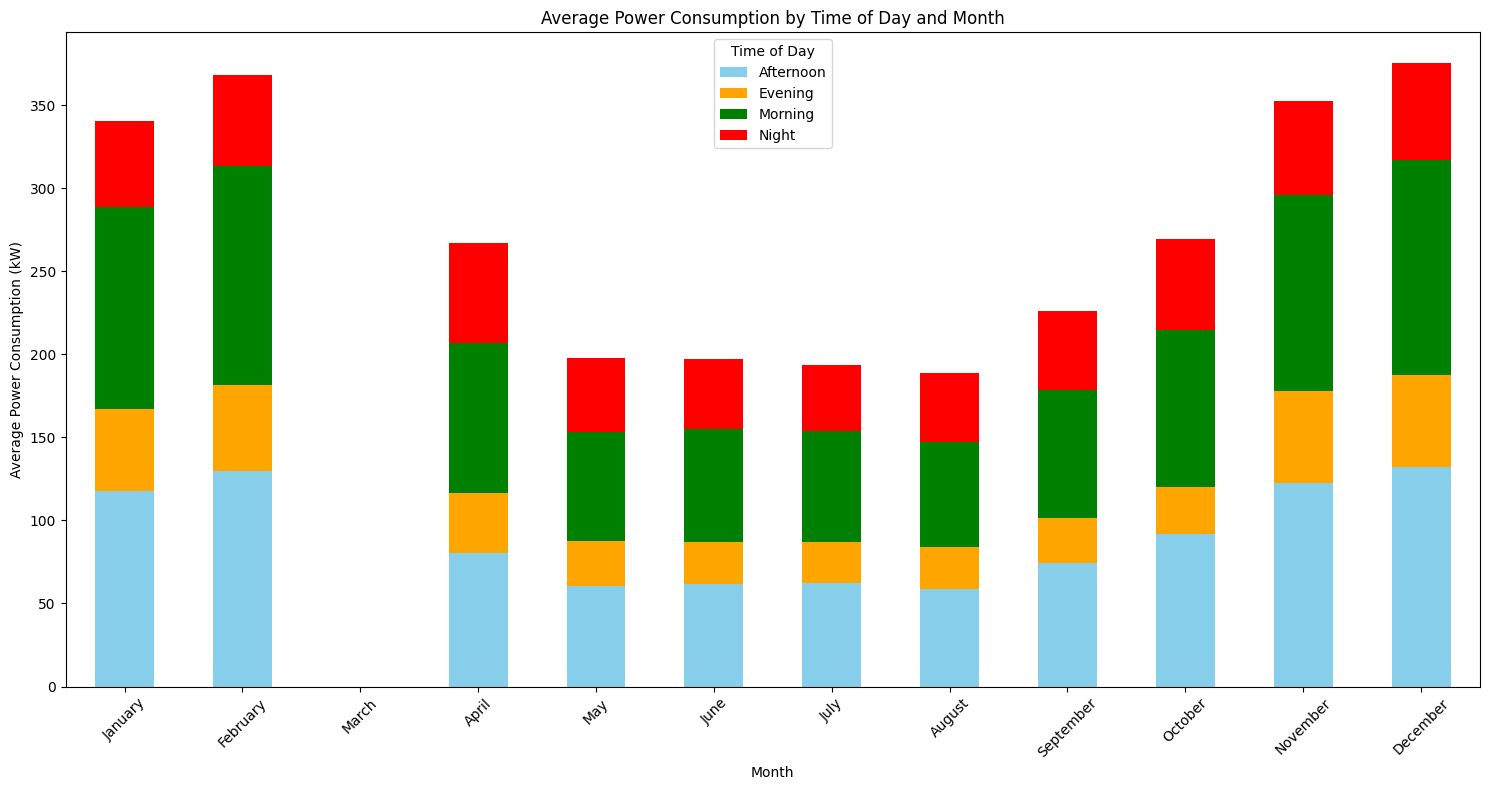

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time bins
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 19 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the binning function
df_1h['time_of_day'] = df_1h['timestamp'].dt.hour.apply(time_of_day)
df_1h['month'] = df_1h['timestamp'].dt.strftime('%B')  # Extract month name

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert month column to categorical type with ordered levels
df_1h['month'] = pd.Categorical(df_1h['month'], categories=month_order, ordered=True)

# Aggregate data by time of day and month
time_of_day_avg_per_month = df_1h.groupby(['month', 'time_of_day'])['main_meter(kW)'].mean().unstack()

# Plotting
time_of_day_avg_per_month.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Average Power Consumption by Time of Day and Month')
plt.ylabel('Average Power Consumption (kW)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()


In [9]:
df_1h['day_of_week'] = df_1h['timestamp'].dt.day_name() #to get the day, so as to use for offices

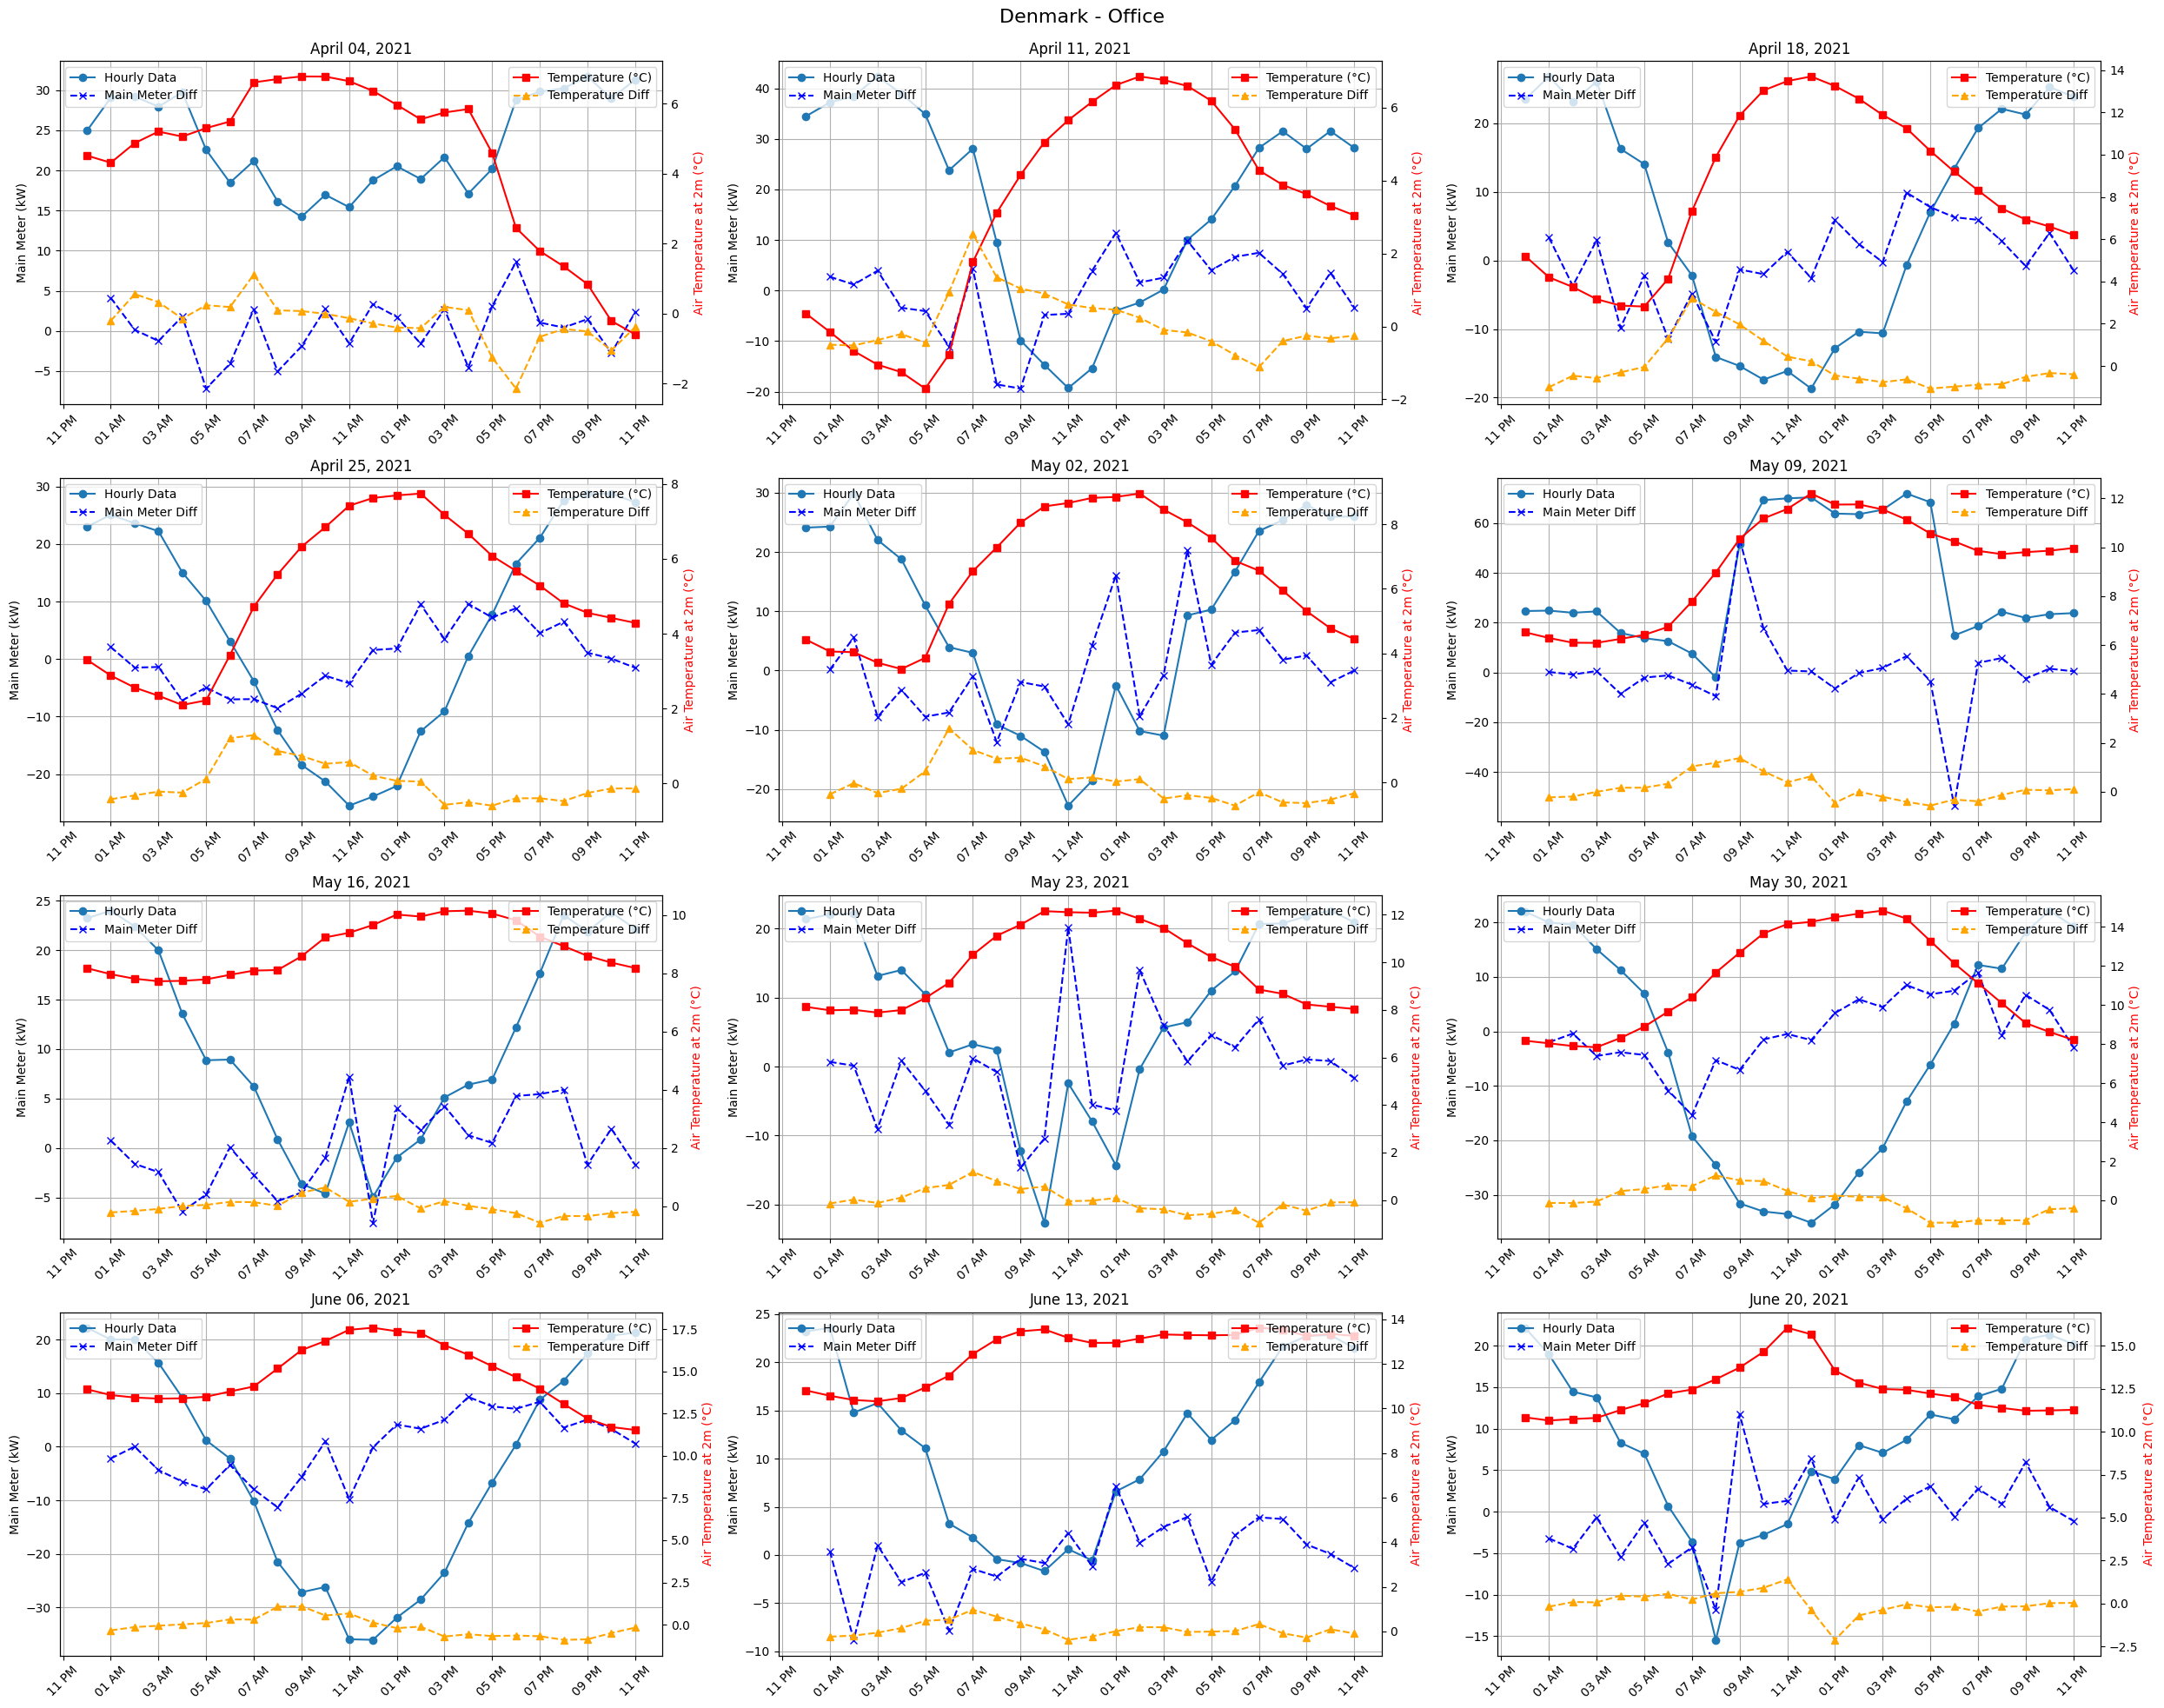

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of Sundays for each month
dates = pd.date_range(start='2021-04-01', end='2022-03-01', freq='W-SUN').date

# Limit dates to 12 (if there are more than 12 Sundays)
dates = dates[:12]

# Create a 3x4 grid of subplots (adjust according to the number of Sundays)
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each Sunday and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    if not one_day_hourly.empty and not one_day_weather.empty:
        # Calculate the derivative for main_meter(kW) data
        main_meter_diff = one_day_hourly['main_meter(kW)'].diff() / (one_day_hourly['timestamp'].diff().dt.total_seconds() / 3600)

        # Plot hourly data
        axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
        axes[i].plot(one_day_hourly['timestamp'], main_meter_diff, marker='x', linestyle='--', color='blue', label='Main Meter Diff')

        axes[i].set_ylabel('Main Meter (kW)')
        axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
        axes[i].grid(True)
        axes[i].legend(loc='upper left')

        # Plot weather data
        ax2 = axes[i].twinx()
        air_temp_diff = one_day_weather['air_temperature_at_2m(deg_C)'].diff() / (one_day_weather['timestamp'].diff().dt.total_seconds() / 3600)
        ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
        ax2.plot(one_day_weather['timestamp'], air_temp_diff, marker='^', linestyle='--', color='orange', label='Temperature Diff')
        ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
        ax2.legend(loc='upper right')

        # Limit x-ticks to avoid max ticks error
        ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


In [11]:
# Filter out Saturdays and Sundays
non_weekend_df = df_1h[~df_1h['day_of_week'].isin(['Saturday', 'Sunday'])]

# Find the top 10 minimum observed 'main_meter(kW)' ratings
top_10_min_ratings = non_weekend_df.nsmallest(10, 'main_meter(kW)')

top_10_min_ratings

#Take 1 as the minimum load, as it is what is shown if we take only saturday and sunday to caluclate the baseline
# minimum load from below data if the mae comes less (use 12-14...)

,timestamp,main_meter(kW),PV_battery_system(kW),time_of_day,month,day_of_week
1117,2021-05-17 13:00:00+00:00,-31.345758,45.214291,Afternoon,May,Monday
1017,2021-05-13 09:00:00+00:00,-31.174994,45.003860,Morning,May,Thursday
1116,2021-05-17 12:00:00+00:00,-30.347456,47.505093,Afternoon,May,Monday
1021,2021-05-13 13:00:00+00:00,-27.338329,41.475616,Afternoon,May,Thursday
1118,2021-05-17 14:00:00+00:00,-26.618649,40.223869,Afternoon,May,Monday
1114,2021-05-17 10:00:00+00:00,-25.040325,39.730690,Morning,May,Monday
1115,2021-05-17 11:00:00+00:00,-24.804998,37.317142,Morning,May,Monday
1018,2021-05-13 10:00:00+00:00,-23.408472,37.392460,Morning,May,Thursday
1020,2021-05-13 12:00:00+00:00,-19.960003,32.789474,Afternoon,May,Thursday
1280,2021-05-24 08:00:00+00:00,-18.993336,36.247894,Morning,May,Monday


In [12]:
df_1h['PV_battery_system(kW)'].fillna(0)
df_1h['main_meter(kW)'].fillna(0)

0        62.873325
1        66.489815
2        65.625000
3        67.636673
4        65.049164
           ...    
7669    160.416702
7670     52.076275
7671     35.258327
7672     35.268330
7673     32.077969
Name: main_meter(kW), Length: 7674, dtype: float64

In [13]:
#consumed-PV = main meter, therefore :- consumed = main_meter + PV
df_1h['Consumed'] = df_1h['PV_battery_system(kW)'] + df_1h['main_meter(kW)']

In [18]:
import pandas as pd

# Assuming df_1h is your DataFrame and already loaded

# Filter out Saturdays and Sundays
non_weekend_df = df_1h[~df_1h['day_of_week'].isin(['Saturday', 'Sunday'])]

# Find the top 20 minimum observed 'main_meter(kW)' ratings
top_20_min_ratings = non_weekend_df.nsmallest(20, 'main_meter(kW)')

# Create a new column for baseline load
df_1h['baseline_load_month'] = None

# Iterate over each unique month and find the minimum load for that month
for month in df_1h['timestamp'].dt.to_period('M').unique():

    month_df = non_weekend_df[non_weekend_df['timestamp'].dt.to_period('M') == month]
    
    if not month_df.empty:
        # Get the minimum load for this month
        min_load = month_df['Consumed'].min()
        
        # Assign the minimum load to all days in this month
        df_1h.loc[df_1h['timestamp'].dt.to_period('M') == month, 'baseline_load_month'] = min_load

# Now, df_1h has a new column 'baseline_load' with the minimum load observed for each month
df_1h.head()


,timestamp,main_meter(kW),PV_battery_system(kW),time_of_day,month,day_of_week,Consumed,baseline_load_month
0,2021-04-01 00:00:00+00:00,62.873325,NaN,Night,April,Thursday,NaN,16.799017
1,2021-04-01 01:00:00+00:00,66.489815,0.0,Night,April,Thursday,66.489815,16.799017
2,2021-04-01 02:00:00+00:00,65.625000,NaN,Night,April,Thursday,NaN,16.799017
3,2021-04-01 03:00:00+00:00,67.636673,NaN,Night,April,Thursday,NaN,16.799017
4,2021-04-01 04:00:00+00:00,65.049164,NaN,Night,April,Thursday,NaN,16.799017


In [19]:
import pandas as pd

# Constants
area = 2200  # area in square meters
base_temperature = 18  # base temperature in °C (common threshold for heating needs)

# Consumption rates (in kW per square meter)
lighting_kw_per_sqm = 0.005  # kW/m^2 (based on 15 W/m^2)
equipment_kw_per_sqm = 0.000  # kW/m^2 (based on 25 W/m^2)

# Calculate total lighting and equipment consumption for the area
total_lighting_kw = lighting_kw_per_sqm * area  # Lights on from 9 AM to 9 PM
total_equipment_kw = equipment_kw_per_sqm * area  # Equipment on from 9 AM to 6 PM

# Assuming df_weather has columns 'timestamp' and 'air_temperature_at_2m(deg_C)'
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Merge power consumption data (df_1h) with weather data (df_weather)
df_merged = pd.merge(df_1h, df_weather, on='timestamp', how='inner')

# Filter the DataFrame for office hours
df_merged['hour'] = df_merged['timestamp'].dt.hour
df_office_hours = df_merged[(df_merged['hour'] >= 9) & (df_merged['hour'] < 21)]  # 9 AM to 9 PM for lights
df_office_hours['lights_on'] = df_office_hours['hour'] < 21  # Lights on until 9 PM
df_office_hours['equipment_on'] = df_office_hours['hour'] < 18  # Equipment on until 6 PM

# Calculate the expected power consumption from lights and equipment
df_office_hours['expected_lights_kw'] = df_office_hours['lights_on'] * total_lighting_kw
df_office_hours['expected_equipment_kw'] = df_office_hours['equipment_on'] * total_equipment_kw

# Calculate temperature-adjusted baseline load (assuming a linear relationship between temperature and heating)
df_office_hours['temp_adjustment'] = (base_temperature - df_office_hours['air_temperature_at_2m(deg_C)']).clip(lower=0)
df_office_hours['adjusted_baseline'] = df_office_hours['baseline_load_month'] + df_office_hours['temp_adjustment']

# Calculate the heating component considering temperature
df_office_hours['heating_kw'] = (
    df_office_hours['Consumed'] - 
    df_office_hours['adjusted_baseline'] - 
    df_office_hours['expected_lights_kw'] - 
    df_office_hours['expected_equipment_kw']
)

# Apply logic to ensure heating is zero when baseline + lights > consumed
df_office_hours['heating_kw'] = df_office_hours.apply(
    lambda row: max(0, row['heating_kw']) if row['adjusted_baseline'] + row['expected_lights_kw'] > row['Consumed'] else row['heating_kw'],
    axis=1
)

# Apply logic to ensure heating is zero if heating_kw is negative
df_office_hours['heating_kw'] = df_office_hours['heating_kw'].clip(lower=0)

# Display the results
# df_office_hours[['timestamp', 'main_meter(kW)', 'baseline_load_month', 'adjusted_baseline', 'expected_lights_kw', 'expected_equipment_kw', 'heating_kw']].head()


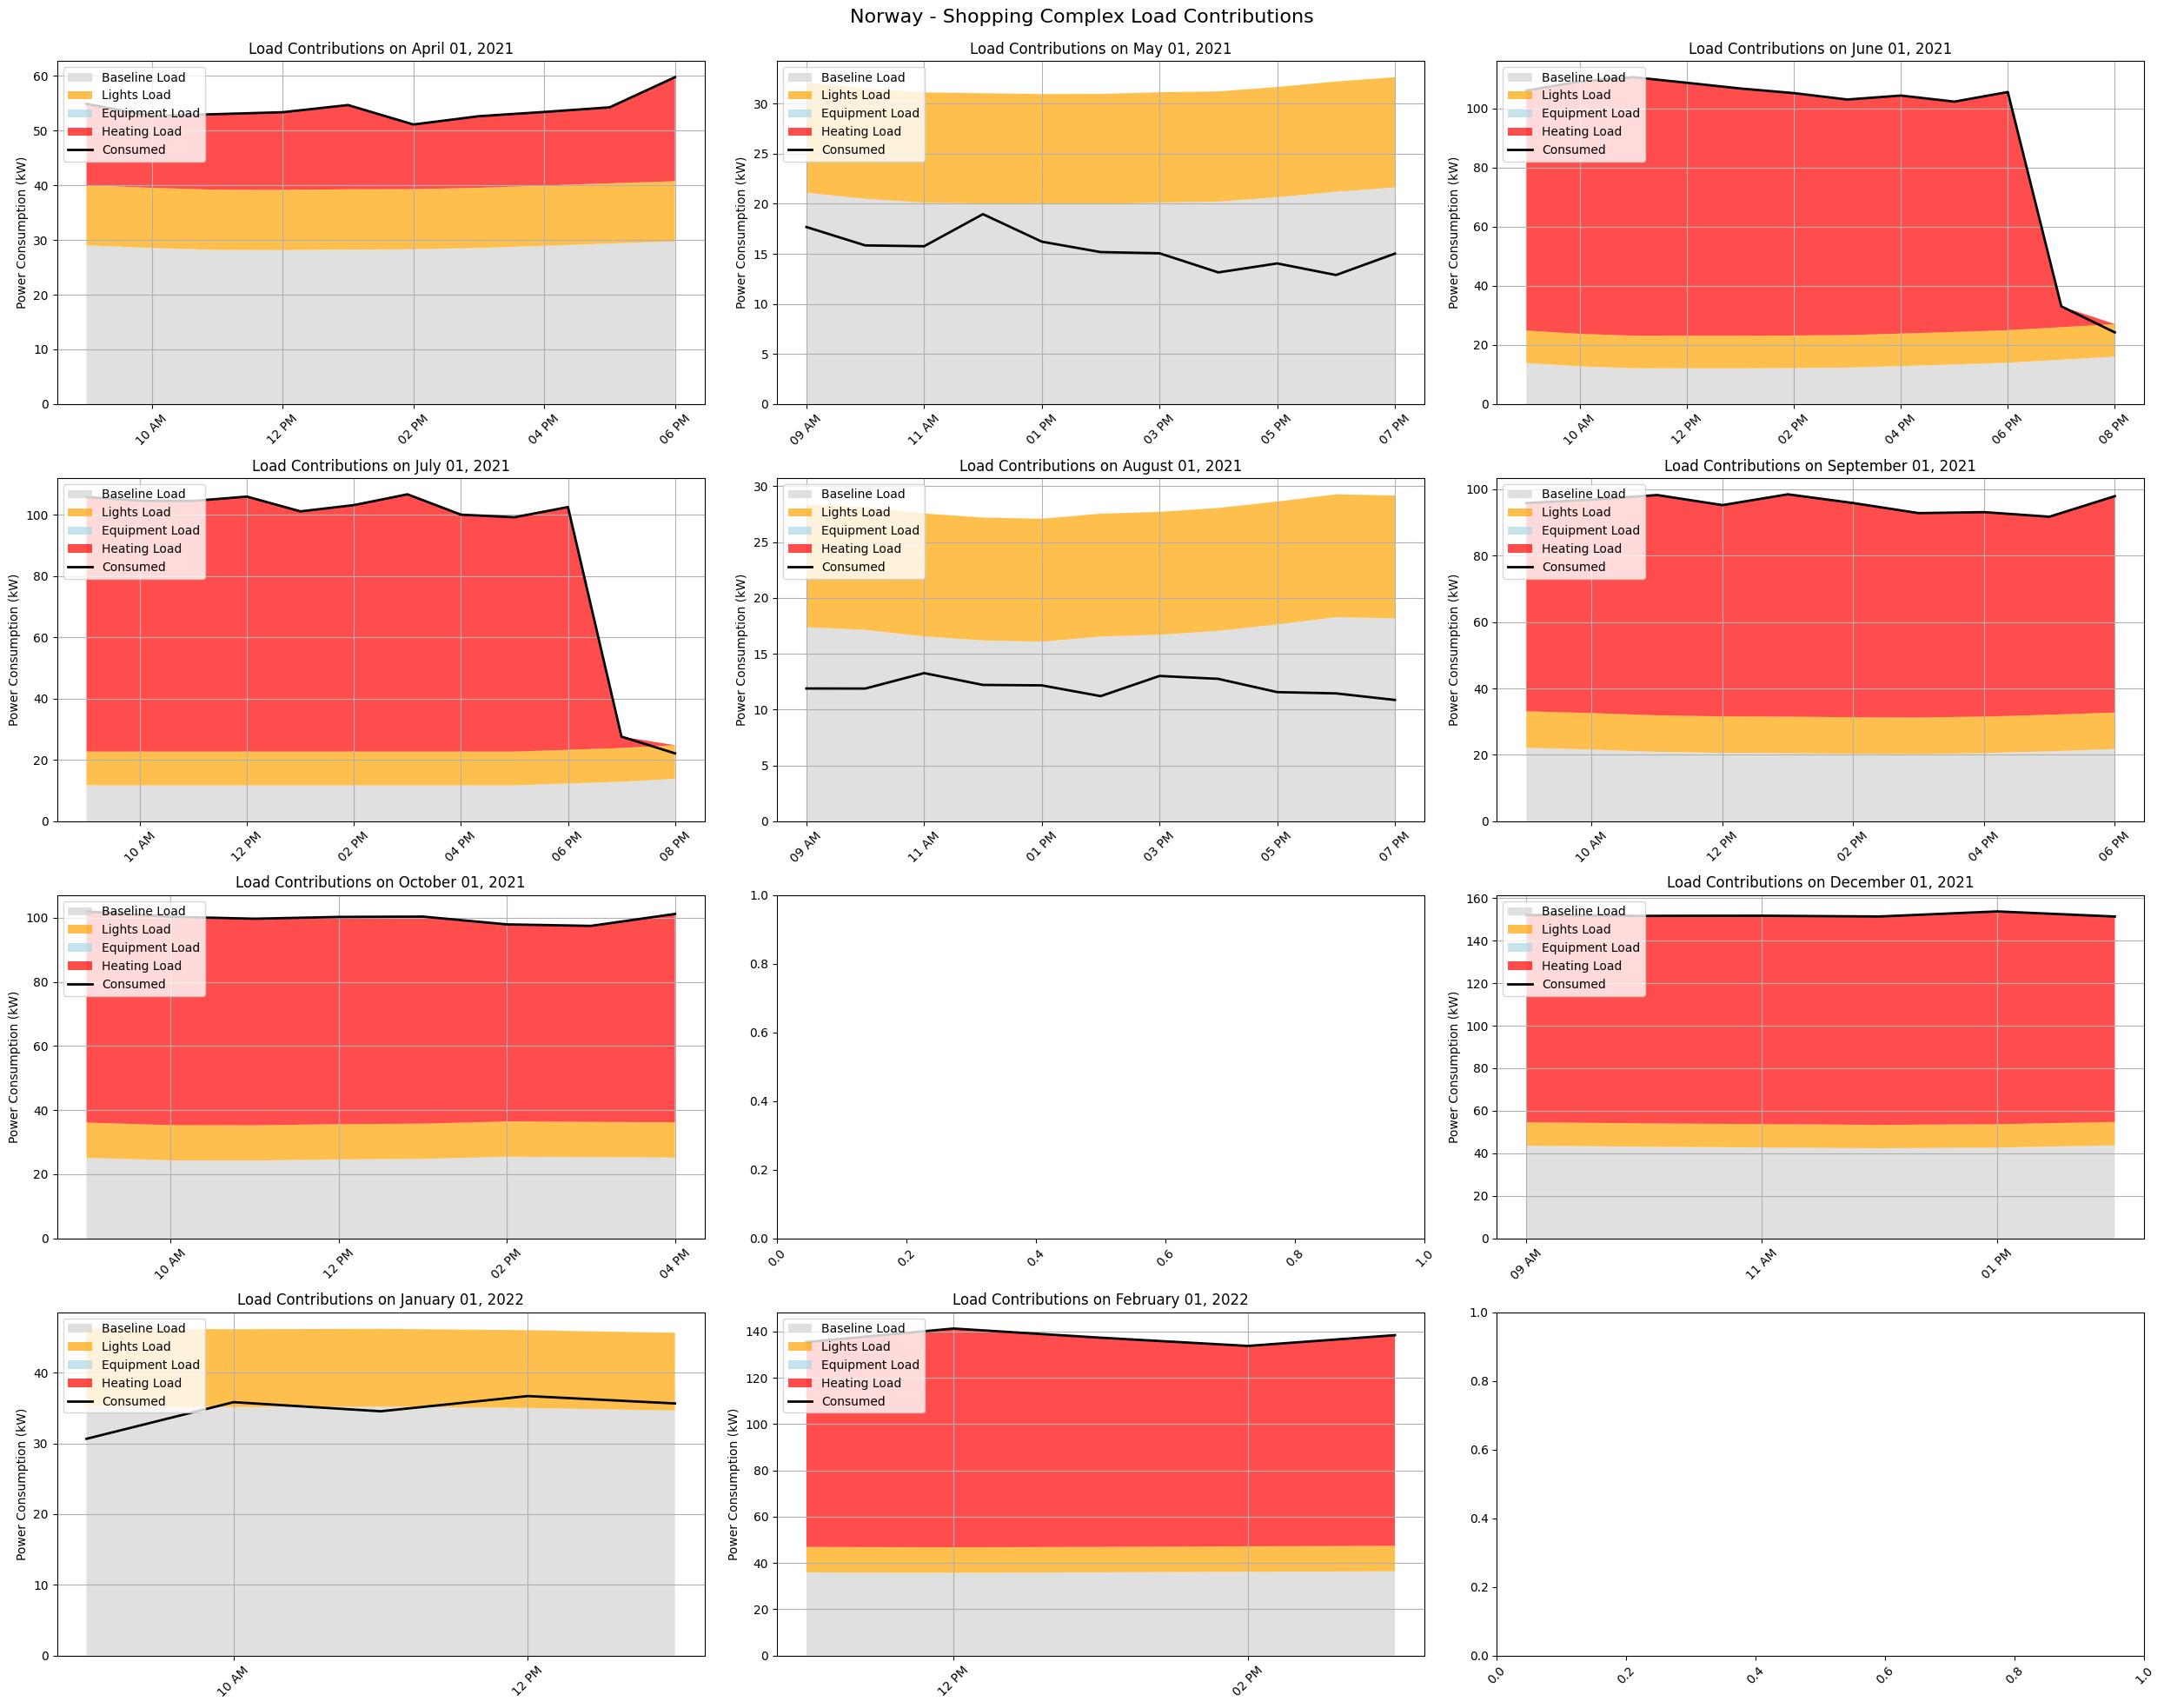

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure columns are numeric and handle any invalid data
numeric_columns = ['Consumed', 'adjusted_baseline', 'expected_lights_kw', 'expected_equipment_kw', 'heating_kw']
df_office_hours[numeric_columns] = df_office_hours[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_office_hours = df_office_hours.dropna(subset=numeric_columns)

# Apply the heating adjustment logic
df_office_hours['heating_kw'] = df_office_hours.apply(
    lambda row: max(0, row['heating_kw']) if row['adjusted_baseline'] + row['expected_lights_kw'] > row['Consumed'] else row['heating_kw'],
    axis=1
)
df_office_hours['heating_kw'] = df_office_hours['heating_kw'].clip(lower=0)

# Extract one day from each month for the plot (e.g., the 1st day of each month)
dates = pd.date_range(start='2021-04-01', end='2022-03-01', freq='MS').date
dates = dates[:12]  # Limit to 12 months

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each date and create the area plot
for i, date in enumerate(dates):
    # Filter data for the selected day
    day_df = df_office_hours[df_office_hours['timestamp'].dt.date == date]
    
    if not day_df.empty:
        # Plot stacked area chart for different load contributions
        axes[i].stackplot(
            day_df['timestamp'],
            day_df['adjusted_baseline'], day_df['expected_lights_kw'], day_df['expected_equipment_kw'], day_df['heating_kw'],
            labels=['Baseline Load', 'Lights Load', 'Equipment Load', 'Heating Load'],
            colors=['lightgray', 'orange', 'lightblue', 'red'],
            alpha=0.7
        )
        
        # Plot the main meter reading
        axes[i].plot(day_df['timestamp'], day_df['Consumed'], color='black', linewidth=2, label='Consumed')
        
        # Set title and labels
        axes[i].set_title(f'Load Contributions on {date.strftime("%B %d, %Y")}')
        axes[i].set_ylabel('Power Consumption (kW)')
        axes[i].legend(loc='upper left')
        axes[i].grid(True)
        
        # Format x-axis ticks
        axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show plot
fig.tight_layout()
fig.suptitle('Norway - Shopping Complex Load Contributions', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()
